In [54]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Variáveis do problema
temp = ctrl.Antecedent(np.arange(-20, 50, 1), 'temperatura')
umidade = ctrl.Antecedent(np.arange(0, 100, 1), 'umidade')
ar_condicionado = ctrl.Consequent(np.arange(12, 35, 1), 'ar_condicionado')
energia = ctrl.Antecedent(np.arange(0, 100, 1), 'energia')
energia_out = ctrl.Consequent(np.arange(0, 100, 1), 'energia_out')


In [55]:
# Funções de pertinência energia
energia['baixa'] = fuzz.trimf(energia.universe, [0, 0, 50])
energia['regular'] = fuzz.trimf(energia.universe, [0, 50, 100])
energia['alta'] = fuzz.trimf(energia.universe, [50, 100, 100])

energia_out['baixa'] = fuzz.trimf(energia_out.universe, [0, 0, 50])
energia_out['regular'] = fuzz.trimf(energia_out.universe, [0, 50, 100])
energia_out['alta'] = fuzz.trimf(energia_out.universe, [50, 100, 100])


In [56]:
# Funções de pertinência temperatura
temp['muito_baixa'] = fuzz.trapmf(temp.universe, [-20, -20, -5, 0])
temp['baixa'] = fuzz.trimf(temp.universe, [-5, 10, 18])
temp['media'] = fuzz.trapmf(temp.universe, [15, 20, 25, 28])
temp['alta'] = fuzz.trimf(temp.universe, [25, 28, 39])
temp['muito_alta'] = fuzz.trapmf(temp.universe, [39, 45, 50, 50])

In [57]:
# Funções de pertinência umidade

umidade['baixa'] = fuzz.trimf(umidade.universe, [0, 0, 30])
umidade['media'] = fuzz.trapmf(umidade.universe, [25, 50, 80, 100])
umidade['alta'] = fuzz.trimf(umidade.universe, [80, 100, 100])

In [58]:
# Funções de pertinência ar_condicionado

ar_condicionado['resfriar2'] = fuzz.trimf(ar_condicionado.universe, [12, 12, 17])
ar_condicionado['resfriar1'] = fuzz.trimf(ar_condicionado.universe, [15, 18, 20])
ar_condicionado['desligar'] = fuzz.trimf(ar_condicionado.universe, [19, 22, 25])
ar_condicionado['aquecer1'] = fuzz.trimf(ar_condicionado.universe, [22, 25, 27])
ar_condicionado['aquecer2'] = fuzz.trapmf(ar_condicionado.universe, [25, 30, 35, 35])

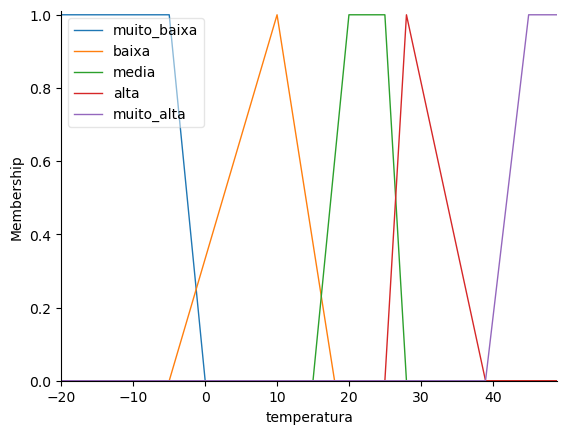

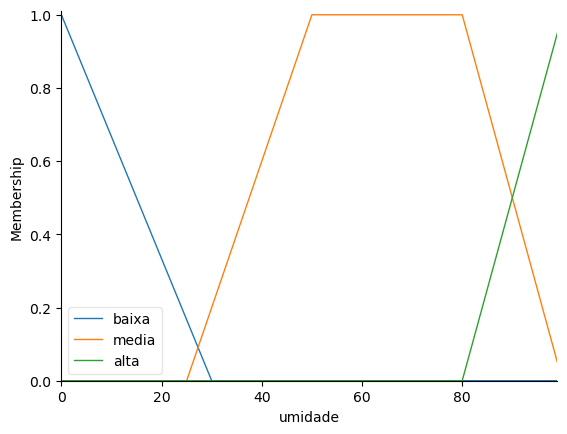

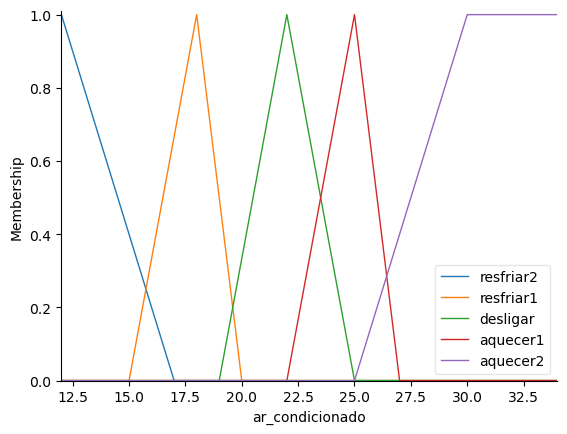

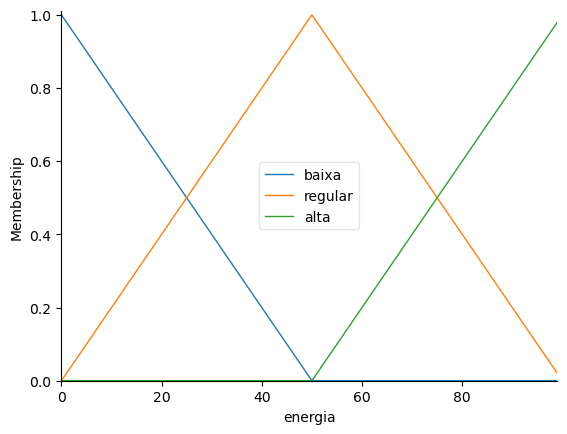

In [60]:
# Visualização das funções de pertinência:

temp.view()
umidade.view()
ar_condicionado.view()
energia.view()

In [61]:
# regras de inferência

rule1 = ctrl.Rule(temp['muito_baixa'], ar_condicionado['aquecer2'])
rule2 = ctrl.Rule(temp['muito_alta'] or (temp['alta'] and umidade['alta']) , ar_condicionado['resfriar2'])
rule3 = ctrl.Rule((temp['media'] and umidade['media']) or umidade['baixa'] , ar_condicionado['desligar'])
rule4 = ctrl.Rule((temp['baixa'] and umidade['media']) or umidade['alta'] , ar_condicionado['aquecer1'])
rule5 = ctrl.Rule(temp['alta'], ar_condicionado['resfriar1'])
rule6 = ctrl.Rule(energia['alta'], energia_out['alta'])
rule7 = ctrl.Rule(energia['regular'], energia_out['regular'])
rule8 = ctrl.Rule(energia['baixa'], energia_out['baixa'])

25.0
49.99013135960527


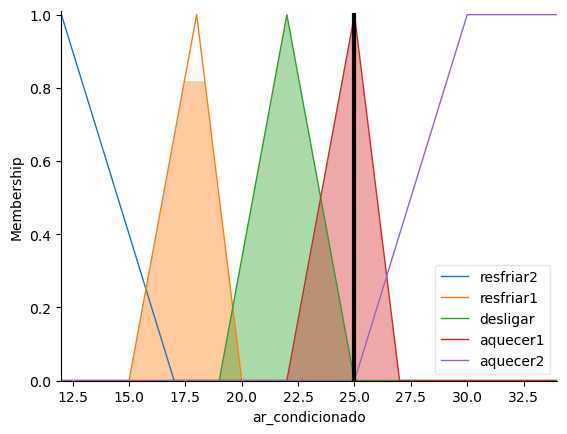

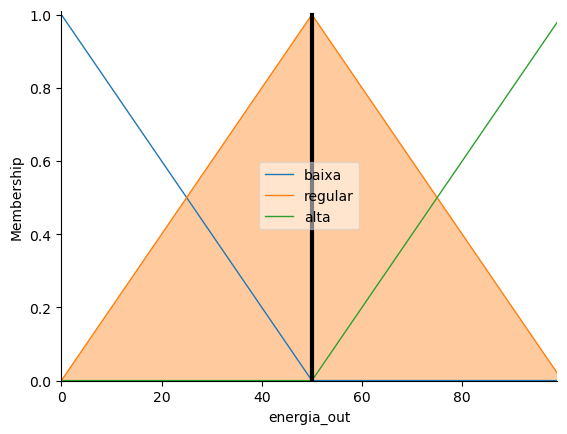

In [76]:
# cria o simulador utilizando as regras de decisão
simulador_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
simulador = ctrl.ControlSystemSimulation(simulador_ctrl)
simulador_ctrl2 = ctrl.ControlSystem([rule6, rule7, rule8])
simulador2 = ctrl.ControlSystemSimulation(simulador_ctrl2)

# Entrando com alguns valores para temperatura e umidade e calculando o valor de ar_condicionado

simulador.input['temperatura'] = 30
simulador.input['umidade'] = 50
simulador2.input['energia'] = 50
simulador2.compute()

# se energia for baixa defuzzifica com minima das maximas
if simulador2.output['energia_out'] == 'baixa':
    ar_condicionado.defuzzify_method = 'mom'
elif simulador2.output['energia_out'] == 'regular':
    ar_condicionado.defuzzify_method = 'som'
else:
    ar_condicionado.defuzzify_method = 'lom'





simulador.compute()


# Visualizando o valor de ar_condicionado graficamente
RESULTADO =  simulador.output['ar_condicionado']
RESULTADO2 = simulador2.output['energia_out']
ar_condicionado.view(sim=simulador)
print(simulador.output['ar_condicionado'])
energia_out.view(sim=simulador2)
print(simulador2.output['energia_out'])






In [77]:
#  Pertinência dos valores de entrada nos seus respectivos conjuntos fuzzy e o valor de saída do sistema fuzzy.

print("\nPertinência de Temperatura")
print("Pertinência temperatura MUITO BAIXA: \t" + str(fuzz.interp_membership(temp.universe, temp['muito_baixa'].mf, RESULTADO)))
print("Pertinência temperatura BAIXA: \t" + str(fuzz.interp_membership(temp.universe, temp['baixa'].mf, RESULTADO)))
print("Pertinência temperatura MEDIA: \t" + str(fuzz.interp_membership(temp.universe, temp['media'].mf, RESULTADO)))
print("Pertinência temperatura ALTA: \t" + str(fuzz.interp_membership(temp.universe, temp['alta'].mf, RESULTADO)))
print("Pertinência temperatura MUITO ALTA: \t" + str(fuzz.interp_membership(temp.universe, temp['muito_alta'].mf, RESULTADO)))

print("\nPertinência de Umidade")
print("Pertinência umidade BAIXA: \t" + str(fuzz.interp_membership(umidade.universe, umidade['baixa'].mf, RESULTADO)))
print("Pertinência umidade MEDIA: \t" + str(fuzz.interp_membership(umidade.universe, umidade['media'].mf, RESULTADO)))
print("Pertinência umidade ALTA: \t" + str(fuzz.interp_membership(umidade.universe, umidade['alta'].mf, RESULTADO)))

print("\nPertinência de Ar Condicionado")
print("Pertinência ar_condicionado RESFRIAR2: \t" + str(fuzz.interp_membership(ar_condicionado.universe, ar_condicionado['resfriar2'].mf, RESULTADO)))
print("Pertinência ar_condicionado RESFRIAR1: \t" + str(fuzz.interp_membership(ar_condicionado.universe, ar_condicionado['resfriar1'].mf, RESULTADO)))
print("Pertinência ar_condicionado DESLIGAR: \t" + str(fuzz.interp_membership(ar_condicionado.universe, ar_condicionado['desligar'].mf, RESULTADO)))
print("Pertinência ar_condicionado AQUECER1: \t" + str(fuzz.interp_membership(ar_condicionado.universe, ar_condicionado['aquecer1'].mf, RESULTADO)))
print("Pertinência ar_condicionado AQUECER2: \t" + str(fuzz.interp_membership(ar_condicionado.universe, ar_condicionado['aquecer2'].mf, RESULTADO)))

print("\nPertinência de Energia")
print("Pertinência energia BAIXA: \t" + str(fuzz.interp_membership(energia.universe, energia['baixa'].mf, RESULTADO)))
print("Pertinência energia REGULAR: \t" + str(fuzz.interp_membership(energia.universe, energia['regular'].mf, RESULTADO)))
print("Pertinência energia ALTA: \t" + str(fuzz.interp_membership(energia.universe, energia['alta'].mf, RESULTADO)))






Pertinência de Temperatura
Pertinência temperatura MUITO BAIXA: 	0.0
Pertinência temperatura BAIXA: 	0.0
Pertinência temperatura MEDIA: 	1.0
Pertinência temperatura ALTA: 	0.0
Pertinência temperatura MUITO ALTA: 	0.0

Pertinência de Umidade
Pertinência umidade BAIXA: 	0.16666666666666666
Pertinência umidade MEDIA: 	0.0
Pertinência umidade ALTA: 	0.0

Pertinência de Ar Condicionado
Pertinência ar_condicionado RESFRIAR2: 	0.0
Pertinência ar_condicionado RESFRIAR1: 	0.0
Pertinência ar_condicionado DESLIGAR: 	0.0
Pertinência ar_condicionado AQUECER1: 	1.0
Pertinência ar_condicionado AQUECER2: 	0.0

Pertinência de Energia
Pertinência energia BAIXA: 	0.5
Pertinência energia REGULAR: 	0.5
Pertinência energia ALTA: 	0.0
